In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('LengthOfStayData.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [4]:
data.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [5]:
# Step 1: Convert date columns to datetime
data['vdate'] = pd.to_datetime(data['vdate'], format='%m/%d/%Y')
data['discharged'] = pd.to_datetime(data['discharged'], format='%m/%d/%Y')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   eid                         100000 non-null  int64         
 1   vdate                       100000 non-null  datetime64[ns]
 2   rcount                      100000 non-null  object        
 3   gender                      100000 non-null  object        
 4   dialysisrenalendstage       100000 non-null  int64         
 5   asthma                      100000 non-null  int64         
 6   irondef                     100000 non-null  int64         
 7   pneum                       100000 non-null  int64         
 8   substancedependence         100000 non-null  int64         
 9   psychologicaldisordermajor  100000 non-null  int64         
 10  depress                     100000 non-null  int64         
 11  psychother                  100000 non-n

In [7]:
# Step 2: Validate `lengthofstay` by recalculating
data['calculated_lengthofstay'] = (data['discharged'] - data['vdate']).dt.days
invalid_rows = data[data['lengthofstay'] != data['calculated_lengthofstay']]
if not invalid_rows.empty:
    print("Inconsistent rows found in lengthofstay calculation:")
    print(invalid_rows[['lengthofstay', 'calculated_lengthofstay']])

In [8]:
# Step 3: Encode categorical variables
# Encode gender: F -> 0, M -> 1
data['gender_encoded'] = data['gender'].map({'F': 0, 'M': 1})

In [9]:
# Encode facility ID as numeric
data['facid_encoded'] = data['facid'].astype('category').cat.codes

In [10]:
# Step 4: Check for outliers in numeric columns
numeric_columns = ['lengthofstay', 'bmi', 'pulse', 'glucose']
outliers = {}
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

In [11]:
# Print outlier summary
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}: {len(outlier_data)} rows")

Outliers in lengthofstay: 132 rows
Outliers in bmi: 685 rows
Outliers in pulse: 1054 rows
Outliers in glucose: 695 rows


In [12]:
data

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,calculated_lengthofstay,gender_encoded,facid_encoded
0,1,2012-08-29,0,F,0,0,0,0,0,0,...,30.432418,96,6.5,4,2012-09-01,B,3,3,0,1
1,2,2012-05-26,5+,F,0,0,0,0,0,0,...,28.460516,61,6.5,1,2012-06-02,A,7,7,0,0
2,3,2012-09-22,1,F,0,0,0,0,0,0,...,28.843812,64,6.5,2,2012-09-25,B,3,3,0,1
3,4,2012-08-09,0,F,0,0,0,0,0,0,...,27.959007,76,6.5,1,2012-08-10,A,1,1,0,0
4,5,2012-12-20,0,F,0,0,0,1,0,1,...,30.258927,67,5.6,2,2012-12-24,E,4,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2012-01-28,3,M,0,0,0,0,0,0,...,30.063069,80,6.5,1,2012-02-03,B,6,6,1,1
99996,99997,2012-08-06,0,M,0,0,0,0,0,0,...,28.969548,61,6.5,1,2012-08-07,B,1,1,1,1
99997,99998,2012-07-23,1,M,0,0,1,0,0,0,...,26.354919,61,6.9,1,2012-07-27,C,4,4,1,2
99998,99999,2012-12-19,0,M,0,0,0,0,0,0,...,29.193462,59,5.6,1,2012-12-23,B,4,4,1,1


In [13]:
# Define a function to cap outliers using the IQR method
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].apply(lambda x: max(min(x, upper_bound), lower_bound))
    return df

# Cap outliers for the identified numeric columns
columns_to_cap = ['lengthofstay', 'bmi', 'pulse', 'glucose']
for col in columns_to_cap:
    data = cap_outliers(data, col)

# Verify the capped outliers
capped_outliers = {}
for col in columns_to_cap:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    capped_outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Print summary of capped outliers
for col, outlier_data in capped_outliers.items():
    print(f"Remaining outliers in {col}: {len(outlier_data)} rows")

Remaining outliers in lengthofstay: 0 rows
Remaining outliers in bmi: 0 rows
Remaining outliers in pulse: 0 rows
Remaining outliers in glucose: 0 rows


In [14]:
missing_data = data.isnull().sum()
print("Missing values in each column:")
print(missing_data[missing_data > 0])

Missing values in each column:
Series([], dtype: int64)


In [15]:
print(data.dtypes)

eid                                    int64
vdate                         datetime64[ns]
rcount                                object
gender                                object
dialysisrenalendstage                  int64
asthma                                 int64
irondef                                int64
pneum                                  int64
substancedependence                    int64
psychologicaldisordermajor             int64
depress                                int64
psychother                             int64
fibrosisandother                       int64
malnutrition                           int64
hemo                                   int64
hematocrit                           float64
neutrophils                          float64
sodium                               float64
glucose                              float64
bloodureanitro                       float64
creatinine                           float64
bmi                                  float64
pulse     

In [16]:
print(data.describe())

                 eid                          vdate  dialysisrenalendstage  \
count  100000.000000                         100000          100000.000000   
mean    50000.500000  2012-07-02 09:42:03.743999744               0.036420   
min         1.000000            2012-01-01 00:00:00               0.000000   
25%     25000.750000            2012-04-01 00:00:00               0.000000   
50%     50000.500000            2012-07-03 00:00:00               0.000000   
75%     75000.250000            2012-10-03 00:00:00               0.000000   
max    100000.000000            2013-01-01 00:00:00               1.000000   
std     28867.657797                            NaN               0.187334   

              asthma        irondef          pneum  substancedependence  \
count  100000.000000  100000.000000  100000.000000        100000.000000   
mean        0.035270       0.094940       0.039450             0.063060   
min         0.000000       0.000000       0.000000             0.000000 

In [17]:
print(data['gender_encoded'].unique())
print(data['facid_encoded'].unique())

[0 1]
[1 0 4 3 2]


In [18]:
cleaned_file_path = 'Cleaned_LengthOfStayData.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as: {cleaned_file_path}")

Cleaned dataset saved as: Cleaned_LengthOfStayData.csv


# EDA

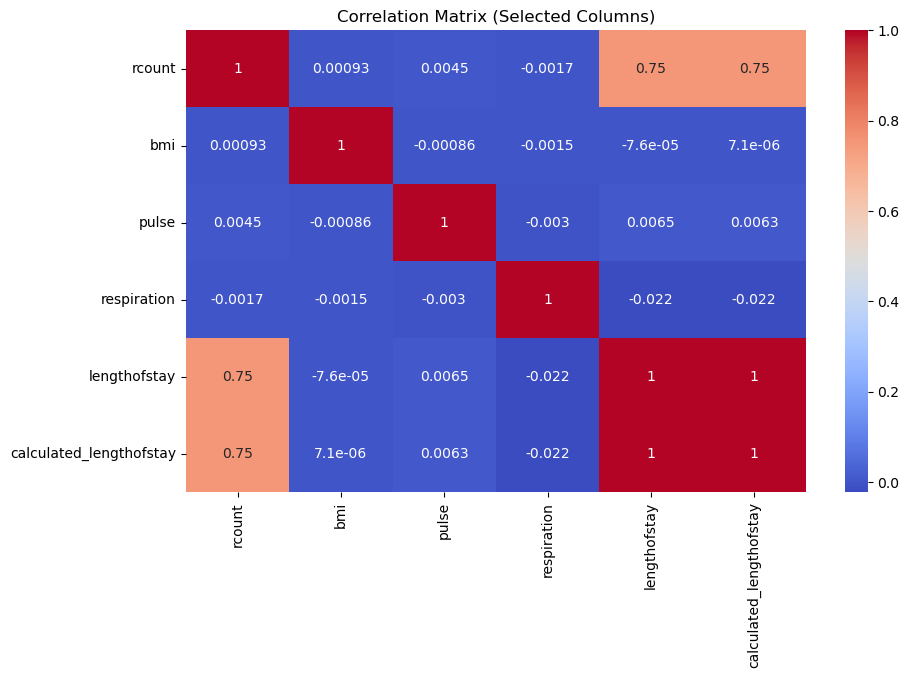

In [22]:
# Select relevant and numerical columns for correlation analysis
important_numerical_columns = [
    'rcount', 'bmi', 'pulse', 'respiration', 'lengthofstay', 
    'calculated_lengthofstay'
]

# Filter the dataset to include only these columns
filtered_data = data[important_numerical_columns]

# Compute the correlation matrix
filtered_correlation_matrix = filtered_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Selected Columns)")
plt.show()


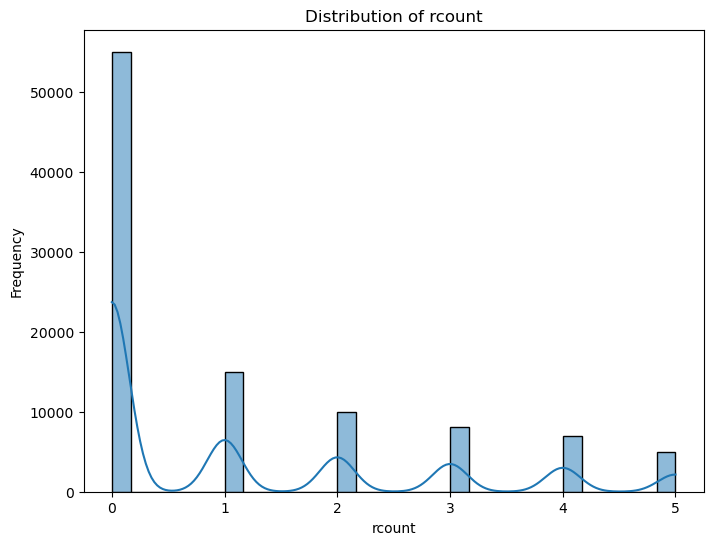

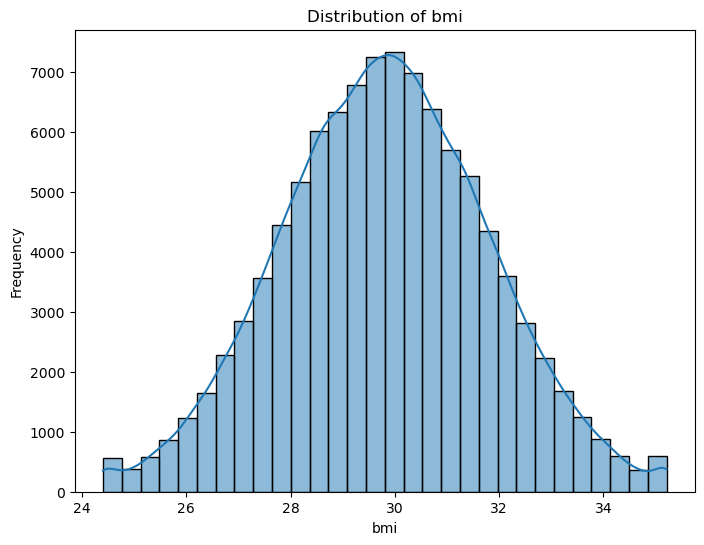

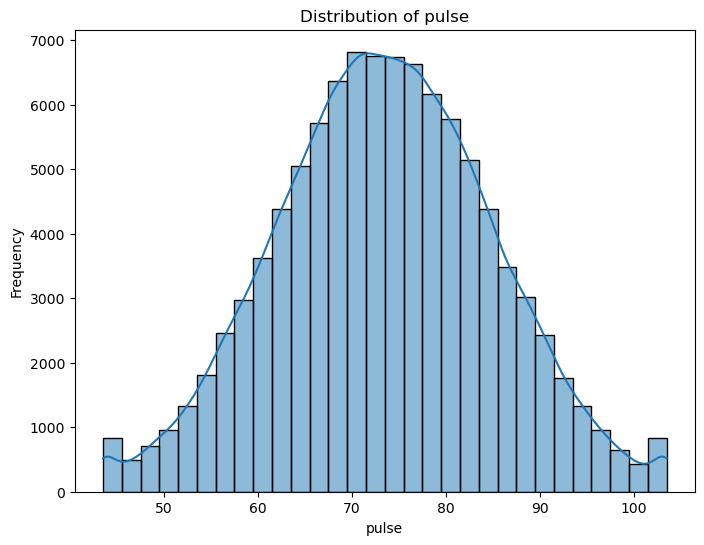

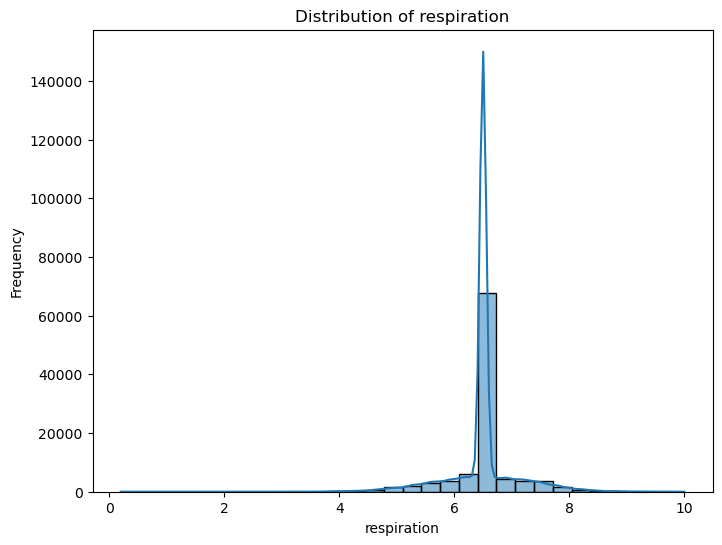

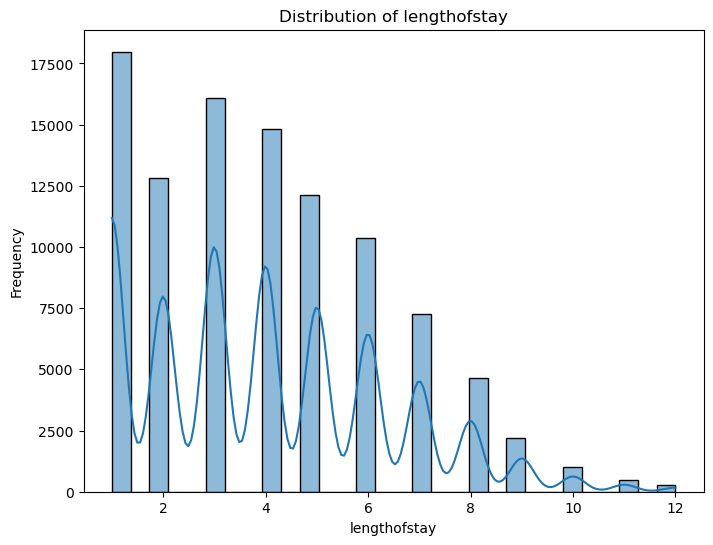

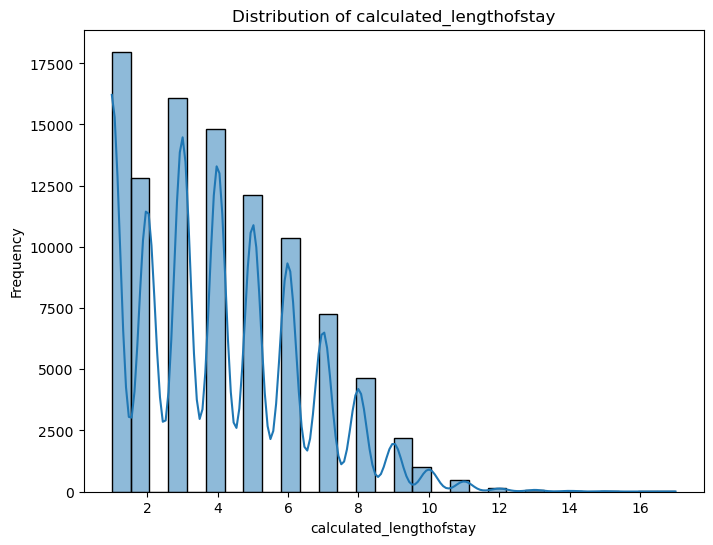

In [23]:
# Plot distributions
for column in filtered_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(filtered_data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

/Users/varunkumaratkuri/anaconda3/envs/newdataenv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


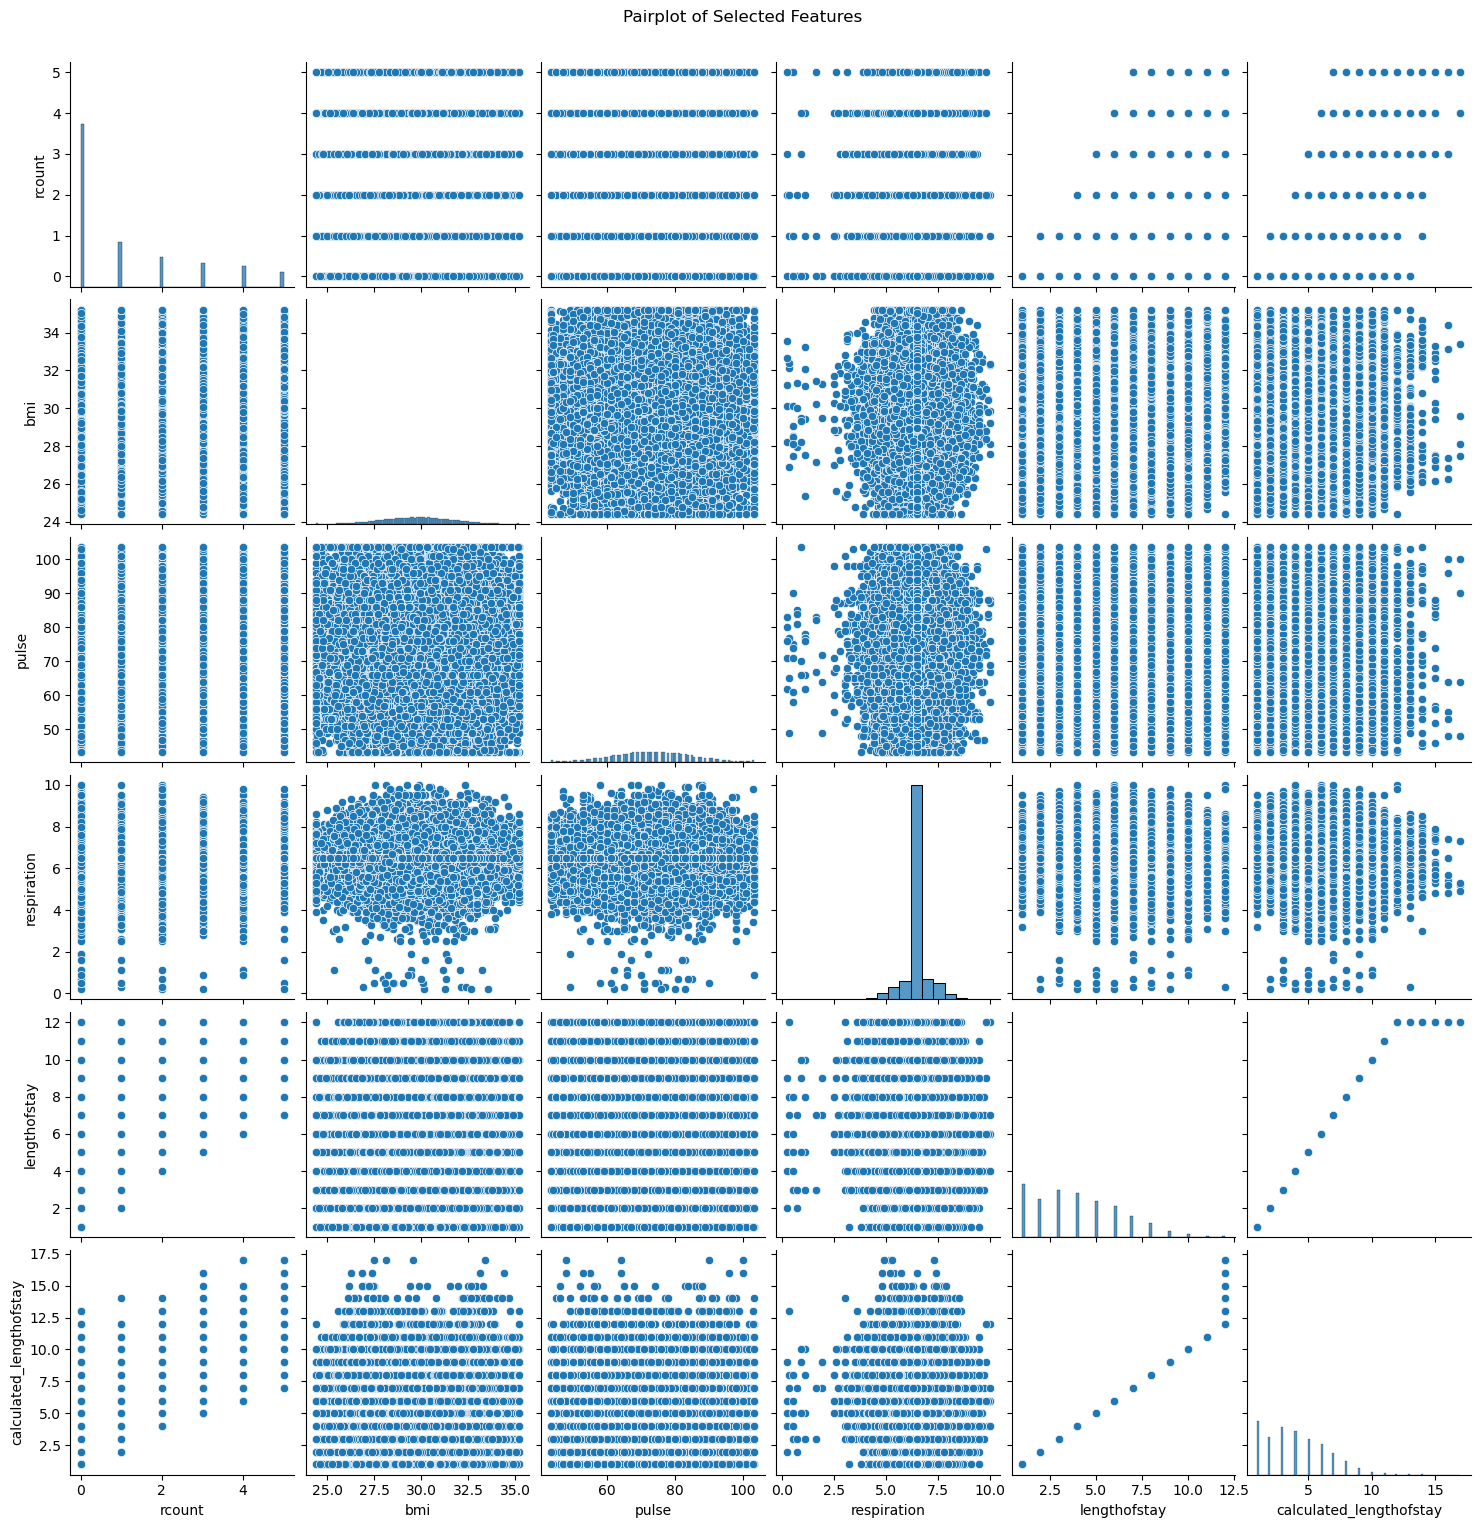

In [24]:
# 4. Pairplot for Visualizing Relationships
sns.pairplot(filtered_data)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()